In [1]:

import torch
import matplotlib.pyplot as plt
import json
from torch.optim import Adam
from utils.pipeline import forward, get_latent_mean_std, get_latent_from_text
from utils.similarity import CLIP_similarity, DINO_similarity

torch.cuda.empty_cache()

/home/schmid/miniconda3/envs/nphm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = '/home/schmid/data/validation_set.json'
with open(dataset_path, 'r') as json_file:
    data = json.load(json_file)

prompt = data['heads'][0]['description neutral']
print(prompt)

A young Asian man with oval face, monolid eyes, snub nose and short hair.


/home/schmid/miniconda3/envs/nphm/lib/python3.9/site-packages/torch/profiler/profiler.py:403: UserWarning: use_cuda is deprecated, use activities argument instead
  warn("use_cuda is deprecated, use activities argument instead")
  0%|          | 0/80 [00:00<?, ?it/s]

/home/schmid/Text2Head/utils/pipeline.py:81: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  prob_score = -delta.T @ torch.inverse(cov) @ delta


update step 1 - score: tensor([[21.9548]], grad_fn=<AddBackward0>)


  1%|▏         | 1/80 [00:02<03:23,  2.58s/it]

update step 2 - score: tensor([[23.2569]], grad_fn=<AddBackward0>)


  2%|▎         | 2/80 [00:04<03:10,  2.44s/it]

update step 3 - score: tensor([[24.2461]], grad_fn=<AddBackward0>)


  4%|▍         | 3/80 [00:07<03:04,  2.40s/it]

update step 4 - score: tensor([[24.6332]], grad_fn=<AddBackward0>)


  5%|▌         | 4/80 [00:09<03:01,  2.38s/it]

update step 5 - score: tensor([[25.9912]], grad_fn=<AddBackward0>)


  6%|▋         | 5/80 [00:11<02:58,  2.37s/it]

update step 6 - score: tensor([[27.8220]], grad_fn=<AddBackward0>)


  8%|▊         | 6/80 [00:14<02:59,  2.42s/it]

update step 7 - score: tensor([[27.9701]], grad_fn=<AddBackward0>)


  9%|▉         | 7/80 [00:16<02:56,  2.42s/it]

update step 8 - score: tensor([[28.4795]], grad_fn=<AddBackward0>)


 10%|█         | 8/80 [00:19<02:55,  2.44s/it]

update step 9 - score: tensor([[28.5941]], grad_fn=<AddBackward0>)


 11%|█▏        | 9/80 [00:21<02:51,  2.42s/it]

update step 10 - score: tensor([[28.6109]], grad_fn=<AddBackward0>)


 12%|█▎        | 10/80 [00:24<02:50,  2.44s/it]

update step 11 - score: tensor([[28.7394]], grad_fn=<AddBackward0>)


 14%|█▍        | 11/80 [00:26<02:47,  2.42s/it]

update step 12 - score: tensor([[28.7235]], grad_fn=<AddBackward0>)


 15%|█▌        | 12/80 [00:29<02:43,  2.41s/it]

update step 13 - score: tensor([[29.1057]], grad_fn=<AddBackward0>)


 16%|█▋        | 13/80 [00:31<02:40,  2.40s/it]

update step 14 - score: tensor([[28.9395]], grad_fn=<AddBackward0>)


 18%|█▊        | 14/80 [00:33<02:37,  2.39s/it]

update step 15 - score: tensor([[29.1854]], grad_fn=<AddBackward0>)


 19%|█▉        | 15/80 [00:36<02:35,  2.39s/it]

update step 16 - score: tensor([[29.0464]], grad_fn=<AddBackward0>)


 20%|██        | 16/80 [00:38<02:33,  2.40s/it]

update step 17 - score: tensor([[28.7836]], grad_fn=<AddBackward0>)


 21%|██▏       | 17/80 [00:40<02:31,  2.40s/it]

update step 18 - score: tensor([[29.3603]], grad_fn=<AddBackward0>)


 22%|██▎       | 18/80 [00:43<02:29,  2.40s/it]

update step 19 - score: tensor([[29.2975]], grad_fn=<AddBackward0>)


 24%|██▍       | 19/80 [00:45<02:26,  2.40s/it]

update step 20 - score: tensor([[28.9528]], grad_fn=<AddBackward0>)


 25%|██▌       | 20/80 [00:48<02:24,  2.41s/it]

update step 21 - score: tensor([[28.8521]], grad_fn=<AddBackward0>)


 26%|██▋       | 21/80 [00:50<02:23,  2.43s/it]

update step 22 - score: tensor([[29.0485]], grad_fn=<AddBackward0>)


 28%|██▊       | 22/80 [00:53<02:20,  2.42s/it]

update step 23 - score: tensor([[29.1340]], grad_fn=<AddBackward0>)


 29%|██▉       | 23/80 [00:55<02:18,  2.42s/it]

update step 24 - score: tensor([[29.5534]], grad_fn=<AddBackward0>)


 30%|███       | 24/80 [00:57<02:15,  2.42s/it]

update step 25 - score: tensor([[29.8366]], grad_fn=<AddBackward0>)


 31%|███▏      | 25/80 [01:00<02:12,  2.42s/it]

update step 26 - score: tensor([[29.7898]], grad_fn=<AddBackward0>)


 32%|███▎      | 26/80 [01:02<02:09,  2.40s/it]

update step 27 - score: tensor([[29.5712]], grad_fn=<AddBackward0>)


 34%|███▍      | 27/80 [01:05<02:07,  2.41s/it]

update step 28 - score: tensor([[29.7757]], grad_fn=<AddBackward0>)


 35%|███▌      | 28/80 [01:07<02:06,  2.43s/it]

update step 29 - score: tensor([[29.3084]], grad_fn=<AddBackward0>)


 36%|███▋      | 29/80 [01:10<02:04,  2.44s/it]

update step 30 - score: tensor([[29.1856]], grad_fn=<AddBackward0>)


 38%|███▊      | 30/80 [01:12<02:05,  2.50s/it]

update step 31 - score: tensor([[28.7685]], grad_fn=<AddBackward0>)


 39%|███▉      | 31/80 [01:15<02:02,  2.51s/it]

update step 32 - score: tensor([[28.8275]], grad_fn=<AddBackward0>)


 40%|████      | 32/80 [01:17<02:00,  2.52s/it]

update step 33 - score: tensor([[29.1762]], grad_fn=<AddBackward0>)


 41%|████▏     | 33/80 [01:20<01:59,  2.54s/it]

update step 34 - score: tensor([[29.0568]], grad_fn=<AddBackward0>)


 42%|████▎     | 34/80 [01:22<01:57,  2.55s/it]

update step 35 - score: tensor([[28.8774]], grad_fn=<AddBackward0>)


 44%|████▍     | 35/80 [01:25<01:54,  2.55s/it]

update step 36 - score: tensor([[29.3386]], grad_fn=<AddBackward0>)


 45%|████▌     | 36/80 [01:28<01:52,  2.55s/it]

update step 37 - score: tensor([[29.2857]], grad_fn=<AddBackward0>)


 46%|████▋     | 37/80 [01:30<01:49,  2.55s/it]

update step 38 - score: tensor([[29.4258]], grad_fn=<AddBackward0>)


 48%|████▊     | 38/80 [01:33<01:48,  2.58s/it]

update step 39 - score: tensor([[29.4319]], grad_fn=<AddBackward0>)


 49%|████▉     | 39/80 [01:36<01:48,  2.64s/it]

update step 40 - score: tensor([[29.5793]], grad_fn=<AddBackward0>)


 50%|█████     | 40/80 [01:38<01:46,  2.66s/it]

update step 41 - score: tensor([[29.8642]], grad_fn=<AddBackward0>)


 51%|█████▏    | 41/80 [01:41<01:42,  2.62s/it]

update step 42 - score: tensor([[30.0691]], grad_fn=<AddBackward0>)


 52%|█████▎    | 42/80 [01:43<01:40,  2.64s/it]

update step 43 - score: tensor([[30.0229]], grad_fn=<AddBackward0>)


 54%|█████▍    | 43/80 [01:46<01:37,  2.62s/it]

update step 44 - score: tensor([[30.3011]], grad_fn=<AddBackward0>)


 55%|█████▌    | 44/80 [01:49<01:34,  2.62s/it]

update step 45 - score: tensor([[30.0431]], grad_fn=<AddBackward0>)


 56%|█████▋    | 45/80 [01:51<01:30,  2.59s/it]

update step 46 - score: tensor([[29.9444]], grad_fn=<AddBackward0>)


 57%|█████▊    | 46/80 [01:54<01:28,  2.60s/it]

update step 47 - score: tensor([[29.9600]], grad_fn=<AddBackward0>)


 59%|█████▉    | 47/80 [01:56<01:24,  2.57s/it]

update step 48 - score: tensor([[29.8723]], grad_fn=<AddBackward0>)


 60%|██████    | 48/80 [01:59<01:22,  2.59s/it]

update step 49 - score: tensor([[29.8057]], grad_fn=<AddBackward0>)


 61%|██████▏   | 49/80 [02:01<01:19,  2.57s/it]

update step 50 - score: tensor([[30.0132]], grad_fn=<AddBackward0>)


 62%|██████▎   | 50/80 [02:04<01:18,  2.61s/it]

update step 51 - score: tensor([[30.3156]], grad_fn=<AddBackward0>)


 64%|██████▍   | 51/80 [02:07<01:15,  2.62s/it]

update step 52 - score: tensor([[30.3437]], grad_fn=<AddBackward0>)


 65%|██████▌   | 52/80 [02:09<01:13,  2.63s/it]

update step 53 - score: tensor([[30.2860]], grad_fn=<AddBackward0>)


 66%|██████▋   | 53/80 [02:12<01:10,  2.61s/it]

update step 54 - score: tensor([[30.3292]], grad_fn=<AddBackward0>)


 68%|██████▊   | 54/80 [02:15<01:07,  2.59s/it]

update step 55 - score: tensor([[30.3202]], grad_fn=<AddBackward0>)


 69%|██████▉   | 55/80 [02:17<01:04,  2.59s/it]

update step 56 - score: tensor([[30.4117]], grad_fn=<AddBackward0>)


 70%|███████   | 56/80 [02:20<01:02,  2.62s/it]

update step 57 - score: tensor([[30.3578]], grad_fn=<AddBackward0>)


 71%|███████▏  | 57/80 [02:22<00:59,  2.60s/it]

update step 58 - score: tensor([[30.5704]], grad_fn=<AddBackward0>)


 72%|███████▎  | 58/80 [02:25<00:57,  2.62s/it]

update step 59 - score: tensor([[30.5368]], grad_fn=<AddBackward0>)


 74%|███████▍  | 59/80 [02:28<00:55,  2.64s/it]

update step 60 - score: tensor([[30.5267]], grad_fn=<AddBackward0>)


 75%|███████▌  | 60/80 [02:30<00:52,  2.65s/it]

update step 61 - score: tensor([[30.6074]], grad_fn=<AddBackward0>)


 76%|███████▋  | 61/80 [02:33<00:50,  2.64s/it]

update step 62 - score: tensor([[30.5688]], grad_fn=<AddBackward0>)


 78%|███████▊  | 62/80 [02:36<00:47,  2.64s/it]

update step 63 - score: tensor([[30.6191]], grad_fn=<AddBackward0>)


 79%|███████▉  | 63/80 [02:38<00:44,  2.62s/it]

update step 64 - score: tensor([[30.7068]], grad_fn=<AddBackward0>)


 80%|████████  | 64/80 [02:41<00:41,  2.59s/it]

update step 65 - score: tensor([[30.6731]], grad_fn=<AddBackward0>)


 81%|████████▏ | 65/80 [02:43<00:39,  2.61s/it]

update step 66 - score: tensor([[30.6909]], grad_fn=<AddBackward0>)


 82%|████████▎ | 66/80 [02:46<00:36,  2.63s/it]

update step 67 - score: tensor([[30.9062]], grad_fn=<AddBackward0>)


 84%|████████▍ | 67/80 [02:49<00:34,  2.64s/it]

update step 68 - score: tensor([[30.9044]], grad_fn=<AddBackward0>)


 85%|████████▌ | 68/80 [02:51<00:31,  2.61s/it]

update step 69 - score: tensor([[31.0029]], grad_fn=<AddBackward0>)


 86%|████████▋ | 69/80 [02:54<00:28,  2.59s/it]

update step 70 - score: tensor([[30.8945]], grad_fn=<AddBackward0>)


 88%|████████▊ | 70/80 [02:56<00:26,  2.60s/it]

update step 71 - score: tensor([[30.6972]], grad_fn=<AddBackward0>)


 89%|████████▉ | 71/80 [02:59<00:23,  2.60s/it]

update step 72 - score: tensor([[30.8683]], grad_fn=<AddBackward0>)


 90%|█████████ | 72/80 [03:02<00:20,  2.61s/it]

update step 73 - score: tensor([[30.9171]], grad_fn=<AddBackward0>)


 91%|█████████▏| 73/80 [03:04<00:18,  2.61s/it]

update step 74 - score: tensor([[30.9784]], grad_fn=<AddBackward0>)


 92%|█████████▎| 74/80 [03:07<00:15,  2.55s/it]

update step 75 - score: tensor([[31.0633]], grad_fn=<AddBackward0>)


 94%|█████████▍| 75/80 [03:09<00:12,  2.59s/it]

update step 76 - score: tensor([[30.9730]], grad_fn=<AddBackward0>)


 95%|█████████▌| 76/80 [03:12<00:10,  2.62s/it]

update step 77 - score: tensor([[31.0769]], grad_fn=<AddBackward0>)


 96%|█████████▋| 77/80 [03:15<00:07,  2.61s/it]

update step 78 - score: tensor([[31.1120]], grad_fn=<AddBackward0>)


 98%|█████████▊| 78/80 [03:17<00:05,  2.59s/it]

update step 79 - score: tensor([[31.2575]], grad_fn=<AddBackward0>)


 99%|█████████▉| 79/80 [03:20<00:02,  2.61s/it]

update step 80 - score: tensor([[31.2682]], grad_fn=<AddBackward0>)


100%|██████████| 80/80 [03:23<00:00,  2.54s/it]


best_CLIP_score tensor([[33.6022]])
best_prob_score tensor(-4.6681)


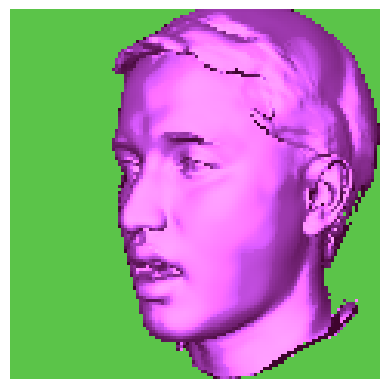

In [3]:
lat_mean, lat_std = get_latent_mean_std()
lat_rep = (torch.randn(lat_mean.shape) * lat_std * 0.85 + lat_mean).detach().requires_grad_(True)

hparams = {
        'resolution': 120,
        'n_iterations': 80,
        'optimizer_lr': 1.4e-3,
        'lr_scheduler_factor': 0.53,
        'lr_scheduler_patience': 5,
        'lr_scheduler_min_lr': 2.6e-5
    }

best_latent, best_CLIP_score, best_prob_score, hist = get_latent_from_text(prompt, hparams, init_lat=lat_mean)
print('best_CLIP_score', best_CLIP_score)
print('best_prob_score', best_prob_score)

lat_rep = best_latent
'''
camera_params = {
        "camera_distance": 1.42,
        "camera_angle": 45.,
        "focal_length": 3.15,
        "max_ray_length": 3, #(0.5 + 1) * 3.15 + 1.5,
        # Image
        "resolution_y": 200,
        "resolution_x": 200
    }

phong_params = {
    "ambient_coeff": 0.67,
    "diffuse_coeff": 0.79,
    "specular_coeff": 0.3,  # 0.63,
    "shininess": 1.,
    # Colors
    "object_color": torch.tensor([0.61, 0.61, 0.61]),  # torch.tensor([0.63, 0.17, 0.78]),
    "background_color": torch.tensor([0., 0., 0.])  # torch.tensor([0.35, 0.94, 0.26])
}

light_params = {
    "amb_light_color": torch.tensor([0.57, 0.5, 0.69]),
    # light 1
    "light_intensity_1": 1.,  # 1.1,
    "light_color_1": torch.tensor([1., 1., 1.]),
    "light_dir_1": torch.tensor([-0.41, -0.51, -0.76]),
    # light p
    "light_intensity_p": 0.,
    "light_color_p": torch.tensor([0.88, 0.99, 0.74]),
    "light_pos_p": torch.tensor([2., 0., 2.])
}
'''
camera_params = {
    "camera_distance": 0.21,
    "camera_angle": 45.,
    "focal_length": 2.57,
    "max_ray_length": 3,
    # Image
    "resolution_y": hparams['resolution'],
    "resolution_x": hparams['resolution']
}
phong_params = {
    "ambient_coeff": 0.51,
    "diffuse_coeff": 0.75,
    "specular_coeff": 0.64,
    "shininess": 0.5,
    # Colors
    "object_color": torch.tensor([0.53, 0.24, 0.64]),
    "background_color": torch.tensor([0.36, 0.77, 0.29])
}

light_params = {
    "amb_light_color": torch.tensor([0.9, 0.16, 0.55]),
    # light 1
    "light_intensity_1": 1.42,
    "light_color_1": torch.tensor([0.8, 0.97, 0.89]),
    "light_dir_1": torch.tensor([-0.6, -0.4, -0.67]),
    # light p
    "light_intensity_p": 0.62,
    "light_color_p": torch.tensor([0.8, 0.97, 0.89]),
    "light_pos_p": torch.tensor([1.19, -1.27, 2.24])
}

with torch.no_grad():
    score_CLIP, score_prob, image = forward(lat_rep, "untextured render of a face", camera_params, phong_params, light_params)
plt.imshow(image.detach().numpy())
plt.axis('off')  # Turn off axes
#plt.savefig("../optim_img/6", bbox_inches='tight')
plt.show()

In [4]:
for entry in data['heads']:
    subject = entry['subject']
    gt_clip = entry['CLIP embedding']
    gt_dino = entry['DINO embedding']
    clip_sim = CLIP_similarity(image, gt_clip)
    dino_sim = DINO_similarity(image, gt_dino)

    print('subject ', subject)
    print('CLIP: ', clip_sim)
    print('DINO: ', dino_sim)

subject  017
CLIP:  tensor([[83.3750]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[88.3216]], device='cuda:0')
subject  018
CLIP:  tensor([[77.8125]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[89.3618]], device='cuda:0')
subject  019
CLIP:  tensor([[76.8750]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[93.2341]], device='cuda:0')
subject  020
CLIP:  tensor([[83.]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[92.7067]], device='cuda:0')
subject  022
CLIP:  tensor([[80.2500]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[93.7759]], device='cuda:0')
subject  023
CLIP:  tensor([[85.3125]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[90.1292]], device='cuda:0')
subject  024
CLIP:  tensor([[71.4375]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[89.7422]], device='cuda:0')
subject  025
CLIP:  tensor([[77.5625]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[93.6496]], device='cuda:0')
subject  026
CLIP:  tensor([

In [ ]:
lat_mean, lat_std = get_latent_mean_std()
lat_rep = (torch.randn(lat_mean.shape) * lat_std * 0.85 + lat_mean).detach().requires_grad_(True)

In [ ]:
optimizer = Adam(params=[lat_rep],
                 lr=0.001, 
                 maximize=True)

In [ ]:
camera_params = {
        "camera_distance": 1.42,
        "camera_angle": -55.,
        "focal_length": 3.15,
        "max_ray_length": 3, #(0.5 + 1) * 3.15 + 1.5,
        # Image
        "resolution_y": 200,
        "resolution_x": 200
    }

phong_params = {
    "ambient_coeff": 0.67,
    "diffuse_coeff": 0.79,
    "specular_coeff": 0.3,  # 0.63,
    "shininess": 1.,
    # Colors
    "object_color": torch.tensor([0.61, 0.61, 0.61]),  # torch.tensor([0.63, 0.17, 0.78]),
    "background_color": torch.tensor([0., 0., 0.])  # torch.tensor([0.35, 0.94, 0.26])
}

light_params = {
    "amb_light_color": torch.tensor([0.57, 0.07, 0.69]),
    # light 1
    "light_intensity_1": 0.,  # 1.1,
    "light_color_1": torch.tensor([0.88, 0.99, 0.74]),
    "light_dir_1": torch.tensor([-0.41, -0.51, -0.76]),
    # light p
    "light_intensity_p": 1.,
    "light_color_p": torch.tensor([0.88, 0.99, 0.74]),
    "light_pos_p": torch.tensor([2., 0., 2.])
}

In [ ]:
with torch.no_grad():
    score_CLIP, score_prob, image = forward(lat_rep, "untextured render of a face", camera_params, phong_params, light_params)
plt.imshow(image.detach().numpy())
plt.axis('off')  # Turn off axes
plt.show()

In [ ]:

score[0].backward()

In [ ]:
init_latent = torch.load("../woman_latent")

In [ ]:
hparams = {
        'resolution': 120,
        'n_iterations': 80,
        'optimizer_lr': 1.4e-3,
        'lr_scheduler_factor': 0.53,
        'lr_scheduler_patience': 5,
        'lr_scheduler_min_lr': 2.6e-5
    }

#torch.cuda.memory._record_memory_history(True)
best_latent, best_score, hist = get_latent_from_text("A person with curly hair", hparams, init_lat=lat_mean)
#torch.cuda.memory._record_memory_history(False)
#torch.cuda.memory._dump_snapshot("../memory_snapshot.pickle")
print(best_score)

In [ ]:
latent = None

In [ ]:
plt.plot(torch.tensor(hist["scores"]).numpy())

In [ ]:
torch.save(latent, "../woman_latent")

In [ ]:
torch.save(torch.stack(hist["latents"]), "latent_history")

In [ ]:
torch.save(torch.stack(hist["images"]), "render_history")

In [ ]:
plt.imshow(hist["images"][-1].detach().numpy())
plt.axis('off')  # Turn off axes
plt.show()
#plt.savefig(f"optim_img/high_lr_{i}", bbox_inches='tight')

In [ ]:
for i, im in enumerate(hist["images"]):
    plt.imshow(im.detach().numpy())
    plt.axis('off')  # Turn off axes
    #plt.show()
    plt.savefig(f"../optim_img/{i}", bbox_inches='tight')